In [35]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#checking python and pandas version
print(sys.version)

print(pd.__version__)


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
2.2.3


In [36]:
#importing various datasets
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

print("The shape of our data is:{}" .format(df.shape))


The shape of our data is:(1460, 81)


In [37]:
#loading in the data to understand what it looks like
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [38]:
ids = df['Id']  # Save Id column
df = df.drop(columns=['Id'])  # Remove Id column for modeling

In [39]:
type(df)
print(df.columns)

df.head(3)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_30/2730948416.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color = 'red', bins=100, hist_kws={'alpha': 0.4});
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


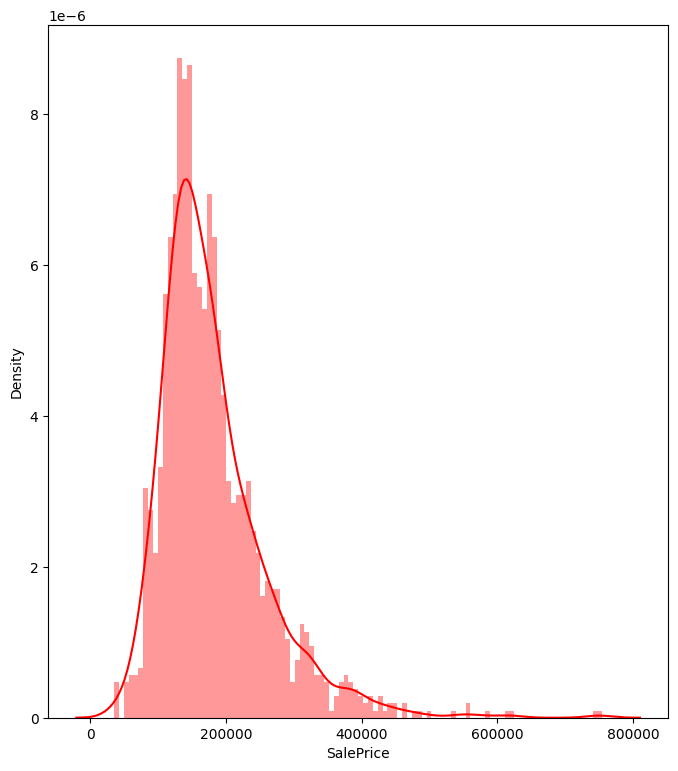

In [41]:
#producing histogram on our target variable

print(df['SalePrice'].describe())
plt.figure(figsize=(8,9))
sns.distplot(df['SalePrice'], color = 'red', bins=100, hist_kws={'alpha': 0.4});

In [42]:
list(set(df.dtypes.tolist()))

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

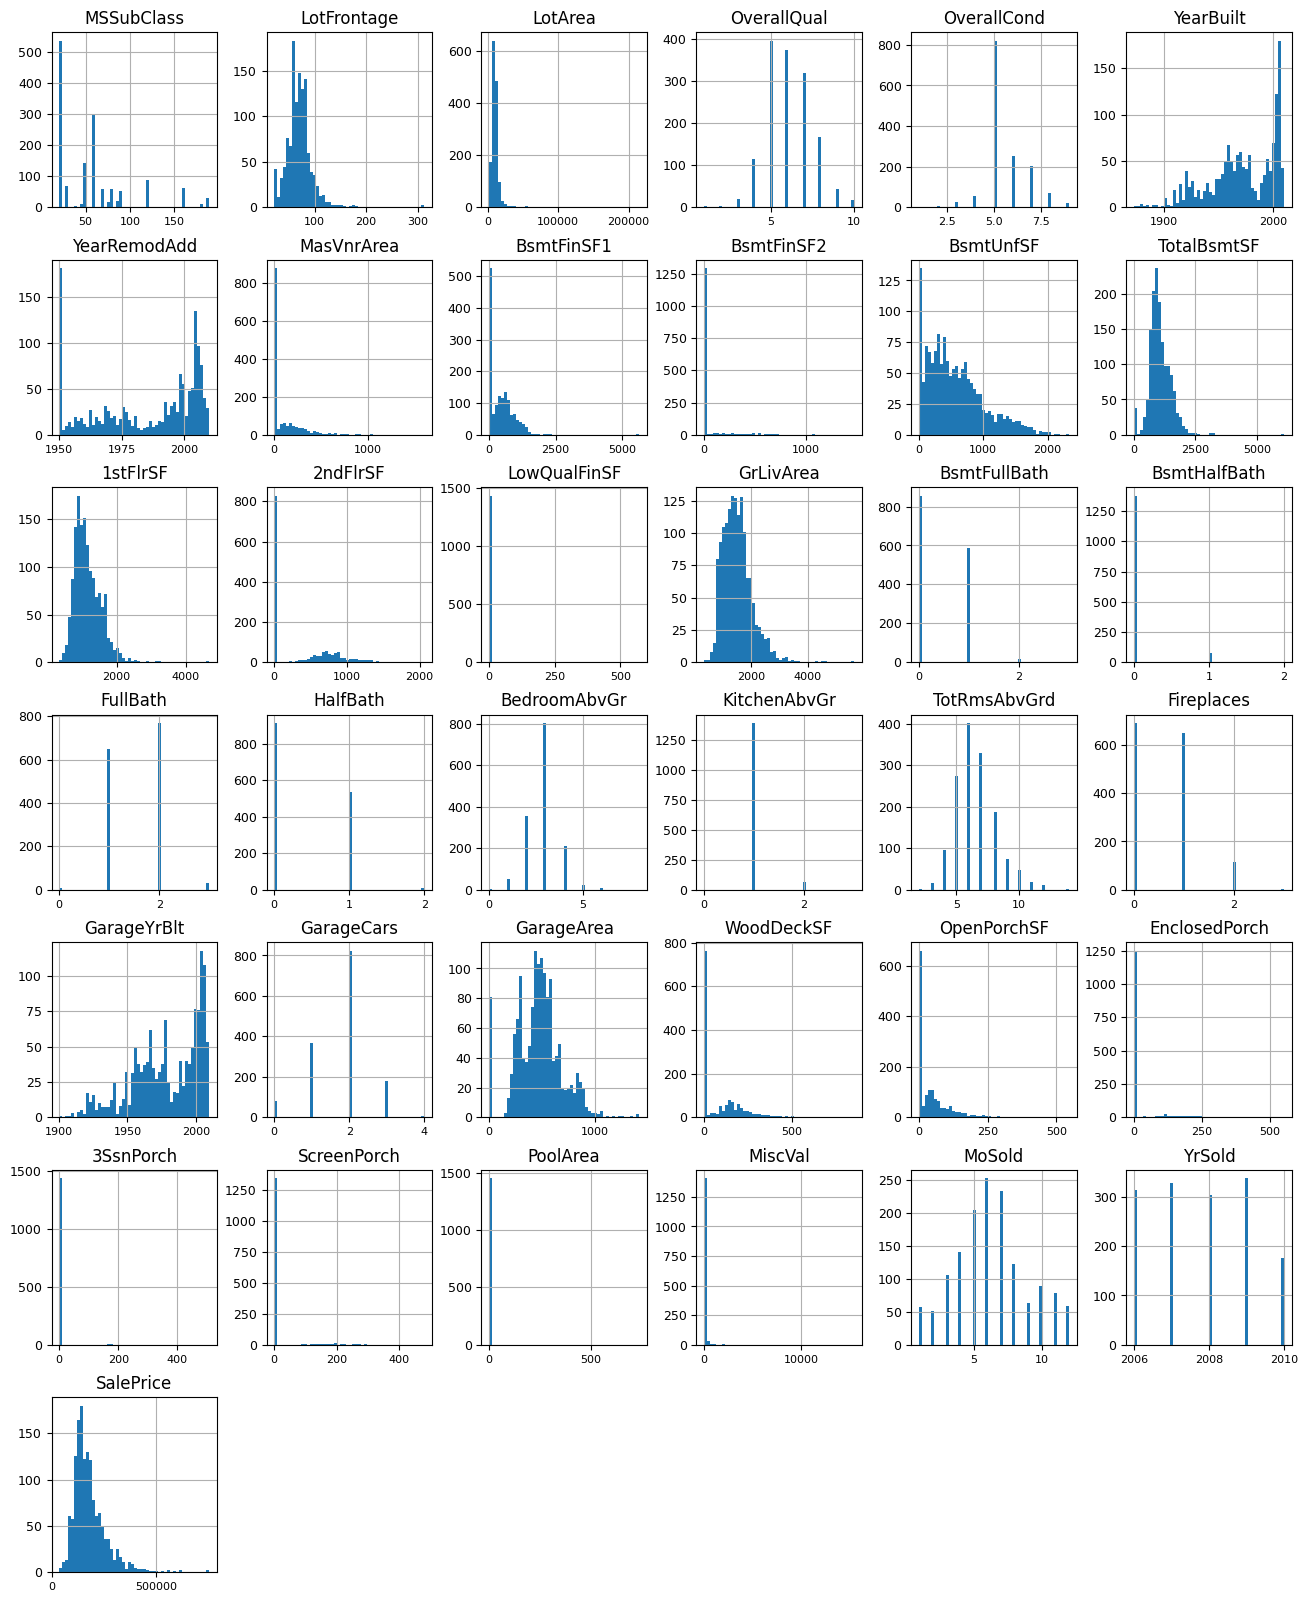

In [43]:
#producing histograms of all the predictor variables with int or float values

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=9)

In [44]:
#define a function to split into training and testing data
def split_dataset(data_set, test_ratio=0.3):
    test_indices = np.random.rand(len(data_set)) < test_ratio
    return data_set[~test_indices], data_set[test_indices]

train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

1032 examples in training, 428 examples in testing.


In [45]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

In [46]:
#select which model from TensorFlow Decision Forests
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [47]:
#using RandomForestModel and specifying the task type as regression
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics = ['MSE'])

Use /tmp/tmp0tqf7o01 as temporary training directory


In [48]:
#training the model
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.995079. Found 1032 examples.
Training model...


[INFO 24-10-30 14:35:15.7029 UTC kernel.cc:1233] Loading model from path /tmp/tmp0tqf7o01/model/ with prefix 6c3046354b284863


Model trained in 0:00:01.916325
Compiling model...


[INFO 24-10-30 14:35:16.0348 UTC decision_forest.cc:734] Model loaded with 300 root(s), 98224 node(s), and 74 input feature(s).
[INFO 24-10-30 14:35:16.0349 UTC abstract_model.cc:1362] Engine "RandomForestOptPred" built
[INFO 24-10-30 14:35:16.0349 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [49]:
#visualising the first tree of the forest, to a depth 3
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

Use /tmp/tmp3waf8bwx as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.970426. Found 1032 examples.
Training model...
Model trained in 0:00:00.143214
Compiling model...


[INFO 24-10-30 14:35:18.1212 UTC kernel.cc:1233] Loading model from path /tmp/tmp3waf8bwx/model/ with prefix 93930cc866424855
[INFO 24-10-30 14:35:18.1324 UTC decision_forest.cc:734] Model loaded with 10 root(s), 3274 node(s), and 62 input feature(s).
[INFO 24-10-30 14:35:18.1325 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 528ms/step - loss: 0.0000e+00 - MSE: 816414208.0000
Use /tmp/tmphkakxsvx as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.010713. Found 1032 examples.
Training model...
Model trained in 0:00:00.201481
Compiling model...


[INFO 24-10-30 14:35:20.7498 UTC kernel.cc:1233] Loading model from path /tmp/tmphkakxsvx/model/ with prefix 2f24a3b3844145b1
[INFO 24-10-30 14:35:20.7717 UTC decision_forest.cc:734] Model loaded with 20 root(s), 6516 node(s), and 64 input feature(s).
[INFO 24-10-30 14:35:20.7718 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 515ms/step - loss: 0.0000e+00 - MSE: 860304320.0000
Use /tmp/tmpi627yf__ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.982593. Found 1032 examples.
Training model...
Model trained in 0:00:00.266742
Compiling model...


[INFO 24-10-30 14:35:23.4020 UTC kernel.cc:1233] Loading model from path /tmp/tmpi627yf__/model/ with prefix 8df6394b08f741b4
[INFO 24-10-30 14:35:23.4349 UTC decision_forest.cc:734] Model loaded with 30 root(s), 9786 node(s), and 66 input feature(s).
[INFO 24-10-30 14:35:23.4350 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 508ms/step - loss: 0.0000e+00 - MSE: 834775680.0000
Use /tmp/tmps8mlt7az as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.966703. Found 1032 examples.
Training model...
Model trained in 0:00:00.326079
Compiling model...


[INFO 24-10-30 14:35:26.0909 UTC kernel.cc:1233] Loading model from path /tmp/tmps8mlt7az/model/ with prefix c4ab422be12c45ba
[INFO 24-10-30 14:35:26.1338 UTC decision_forest.cc:734] Model loaded with 40 root(s), 13088 node(s), and 69 input feature(s).
[INFO 24-10-30 14:35:26.1339 UTC abstract_model.cc:1362] Engine "RandomForestOptPred" built
[INFO 24-10-30 14:35:26.1339 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 508ms/step - loss: 0.0000e+00 - MSE: 815529664.0000
Use /tmp/tmp2z9u664z as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.954650. Found 1032 examples.
Training model...
Model trained in 0:00:00.401077
Compiling model...


[INFO 24-10-30 14:35:28.8387 UTC kernel.cc:1233] Loading model from path /tmp/tmp2z9u664z/model/ with prefix 6145e49278de4b18
[INFO 24-10-30 14:35:28.8936 UTC decision_forest.cc:734] Model loaded with 50 root(s), 16360 node(s), and 69 input feature(s).
[INFO 24-10-30 14:35:28.8937 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 538ms/step - loss: 0.0000e+00 - MSE: 797367808.0000
Use /tmp/tmpcfryvpdf as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.020699. Found 1032 examples.
Training model...
Model trained in 0:00:00.452084
Compiling model...


[INFO 24-10-30 14:35:31.7619 UTC kernel.cc:1233] Loading model from path /tmp/tmpcfryvpdf/model/ with prefix ec1d9669260c435e
[INFO 24-10-30 14:35:31.8269 UTC decision_forest.cc:734] Model loaded with 60 root(s), 19628 node(s), and 71 input feature(s).
[INFO 24-10-30 14:35:31.8270 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 508ms/step - loss: 0.0000e+00 - MSE: 819577344.0000
Use /tmp/tmp7mtvxi9_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.980915. Found 1032 examples.
Training model...
Model trained in 0:00:00.500991
Compiling model...


[INFO 24-10-30 14:35:34.6370 UTC kernel.cc:1233] Loading model from path /tmp/tmp7mtvxi9_/model/ with prefix e38de37f07c2494a
[INFO 24-10-30 14:35:34.7137 UTC decision_forest.cc:734] Model loaded with 70 root(s), 22900 node(s), and 71 input feature(s).
[INFO 24-10-30 14:35:34.7137 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - MSE: 820772928.0000
Use /tmp/tmp0tsp9plc as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.999198. Found 1032 examples.
Training model...
Model trained in 0:00:00.567022
Compiling model...


[INFO 24-10-30 14:35:38.3130 UTC kernel.cc:1233] Loading model from path /tmp/tmp0tsp9plc/model/ with prefix 4f48a116b606444f
[INFO 24-10-30 14:35:38.4006 UTC decision_forest.cc:734] Model loaded with 80 root(s), 26184 node(s), and 71 input feature(s).
[INFO 24-10-30 14:35:38.4006 UTC abstract_model.cc:1362] Engine "RandomForestOptPred" built
[INFO 24-10-30 14:35:38.4007 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 514ms/step - loss: 0.0000e+00 - MSE: 807332864.0000
Use /tmp/tmpiiep52o0 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.048718. Found 1032 examples.
Training model...
Model trained in 0:00:00.782639
Compiling model...


[INFO 24-10-30 14:35:41.5537 UTC kernel.cc:1233] Loading model from path /tmp/tmpiiep52o0/model/ with prefix 8b01f72b18d24eb5
[INFO 24-10-30 14:35:41.6522 UTC decision_forest.cc:734] Model loaded with 90 root(s), 29462 node(s), and 71 input feature(s).
[INFO 24-10-30 14:35:41.6522 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 530ms/step - loss: 0.0000e+00 - MSE: 795695040.0000
Use /tmp/tmpvvz2zwth as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.972263. Found 1032 examples.
Training model...
Model trained in 0:00:00.681046
Compiling model...


[INFO 24-10-30 14:35:44.6390 UTC kernel.cc:1233] Loading model from path /tmp/tmpvvz2zwth/model/ with prefix 859ba89d030545b0
[INFO 24-10-30 14:35:44.7462 UTC decision_forest.cc:734] Model loaded with 100 root(s), 32744 node(s), and 72 input feature(s).
[INFO 24-10-30 14:35:44.7463 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 511ms/step - loss: 0.0000e+00 - MSE: 805135616.0000


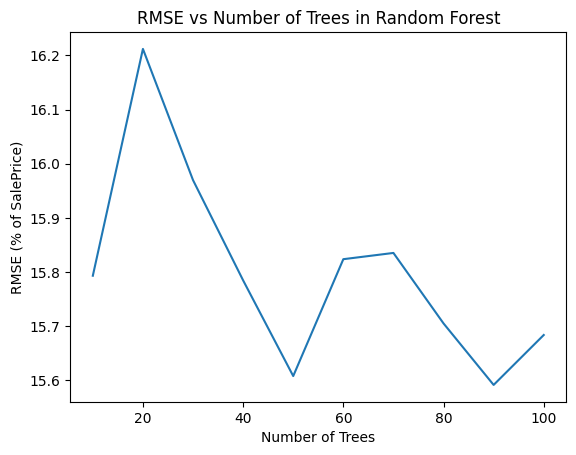

In [50]:
logs = []

# Evaluate Random Forest with various tree counts
for num_trees in range(10, 101, 10):  # Adjust the range and step as desired
    rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION, num_trees=num_trees)
    rf.compile(metrics=["MSE"])
    
    # Fit the model to the training data
    rf.fit(x=train_ds)
    
    # Evaluate the model on test data
    evaluation = rf.evaluate(x=test_ds, return_dict=True)
    rmse = np.sqrt(evaluation["MSE"])  # Root Mean Squared Error
    
    # Append results to logs
    logs.append({'num_trees': num_trees, 'rmse': rmse})

# Calculate mean sale price for normalization
mean_sale_price = df['SalePrice'].mean()

# Plotting RMSE for different tree counts
plt.plot(
    [log['num_trees'] for log in logs], 
    [(log['rmse'] / mean_sale_price) * 100 for log in logs]
)
plt.xlabel('Number of Trees')
plt.ylabel('RMSE (% of SalePrice)')
plt.title('RMSE vs Number of Trees in Random Forest')
plt.show()


In [51]:
#make a inspector to analyse model features
inspector = rf.make_inspector()

evaluation = rf.evaluate(x=test_ds, return_dict = True)
for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 339ms/step - loss: 0.0000e+00 - MSE: 805135616.0000
loss: 0.0000
MSE: 805135616.0000


In [52]:
#Determining variable importances 
print(f"Available variable importances")
for importance in inspector.variable_importances().keys():
    print("\t", importance)
    

Available variable importances
	 SUM_SCORE
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT


In [53]:
inspector.variable_importances()["NUM_AS_ROOT"]


[("OverallQual" (1; #62), 37.0),
 ("Neighborhood" (4; #59), 23.0),
 ("GarageCars" (1; #32), 16.0),
 ("ExterQual" (4; #22), 8.0),
 ("BsmtQual" (4; #14), 5.0),
 ("GrLivArea" (1; #38), 4.0),
 ("KitchenQual" (4; #44), 2.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("FullBath" (1; #29), 1.0),
 ("GarageArea" (1; #31), 1.0),
 ("TotalBsmtSF" (1; #73), 1.0),
 ("YearBuilt" (1; #76), 1.0)]

In [54]:
inspector.variable_importances()["NUM_NODES"]

[("Neighborhood" (4; #59), 1353.0),
 ("GrLivArea" (1; #38), 1245.0),
 ("TotalBsmtSF" (1; #73), 850.0),
 ("GarageArea" (1; #31), 838.0),
 ("LotArea" (1; #47), 761.0),
 ("1stFlrSF" (1; #0), 696.0),
 ("BsmtFinSF1" (1; #8), 664.0),
 ("Exterior2nd" (4; #24), 574.0),
 ("YearRemodAdd" (1; #77), 557.0),
 ("Exterior1st" (4; #23), 502.0),
 ("BsmtUnfSF" (1; #15), 481.0),
 ("OverallQual" (1; #62), 478.0),
 ("BsmtFinType1" (4; #10), 475.0),
 ("LotFrontage" (1; #49), 451.0),
 ("YearBuilt" (1; #76), 424.0),
 ("OpenPorchSF" (1; #60), 412.0),
 ("MoSold" (1; #58), 380.0),
 ("GarageYrBlt" (1; #37), 353.0),
 ("YrSold" (1; #78), 319.0),
 ("WoodDeckSF" (1; #75), 308.0),
 ("2ndFlrSF" (1; #1), 292.0),
 ("MasVnrArea" (1; #54), 286.0),
 ("OverallCond" (1; #61), 267.0),
 ("HeatingQC" (4; #41), 218.0),
 ("GarageFinish" (4; #34), 196.0),
 ("TotRmsAbvGrd" (1; #72), 190.0),
 ("BsmtExposure" (4; #7), 185.0),
 ("KitchenQual" (4; #44), 166.0),
 ("HouseStyle" (4; #42), 154.0),
 ("Fireplaces" (1; #27), 150.0),
 ("MSSubCl

In [55]:
inspector.variable_importances()["SUM_SCORE"]

[("OverallQual" (1; #62), 181869554535351.25),
 ("Neighborhood" (4; #59), 109909249917687.25),
 ("GrLivArea" (1; #38), 63033101304576.06),
 ("GarageCars" (1; #32), 49093100299811.0),
 ("TotalBsmtSF" (1; #73), 36528974870201.0),
 ("1stFlrSF" (1; #0), 30555927507312.5),
 ("BsmtQual" (4; #14), 26476198687403.0),
 ("ExterQual" (4; #22), 26039491343566.0),
 ("GarageArea" (1; #31), 17551805931026.812),
 ("KitchenQual" (4; #44), 15419801459708.25),
 ("FullBath" (1; #29), 14340910093821.0),
 ("BsmtFinSF1" (1; #8), 13820088858509.0),
 ("2ndFlrSF" (1; #1), 11453825093005.5),
 ("LotArea" (1; #47), 7662468900336.25),
 ("YearBuilt" (1; #76), 7370714589239.0),
 ("TotRmsAbvGrd" (1; #72), 6568635367612.25),
 ("Exterior1st" (4; #23), 4255053521927.0625),
 ("Exterior2nd" (4; #24), 3810181198826.625),
 ("Fireplaces" (1; #27), 3758398916246.867),
 ("YearRemodAdd" (1; #77), 3716534145092.5),
 ("LotFrontage" (1; #49), 3126803181743.375),
 ("MasVnrArea" (1; #54), 2835536546207.5),
 ("OpenPorchSF" (1; #60), 2

In [56]:
inspector.variable_importances()["INV_MEAN_MIN_DEPTH"]

[("OverallQual" (1; #62), 0.2587893626915161),
 ("Neighborhood" (4; #59), 0.23855403908645695),
 ("GrLivArea" (1; #38), 0.1869389452314527),
 ("TotalBsmtSF" (1; #73), 0.13528337525256887),
 ("GarageCars" (1; #32), 0.12644033131819715),
 ("1stFlrSF" (1; #0), 0.1259458663211685),
 ("GarageArea" (1; #31), 0.12456999739458982),
 ("FullBath" (1; #29), 0.11535141768516158),
 ("ExterQual" (4; #22), 0.11321851808116938),
 ("BsmtFinSF1" (1; #8), 0.1114858325904295),
 ("BsmtQual" (4; #14), 0.11148306804212918),
 ("YearBuilt" (1; #76), 0.10988439786893933),
 ("2ndFlrSF" (1; #1), 0.1093744750293363),
 ("LotArea" (1; #47), 0.10891232389693235),
 ("KitchenQual" (4; #44), 0.1073000075146696),
 ("YearRemodAdd" (1; #77), 0.10645745170562161),
 ("BsmtFinType1" (4; #10), 0.10474841397462892),
 ("Exterior2nd" (4; #24), 0.10412974462922128),
 ("Exterior1st" (4; #23), 0.10359268660533136),
 ("LotFrontage" (1; #49), 0.10326610893085832),
 ("TotRmsAbvGrd" (1; #72), 0.103141937292814),
 ("Fireplaces" (1; #27),

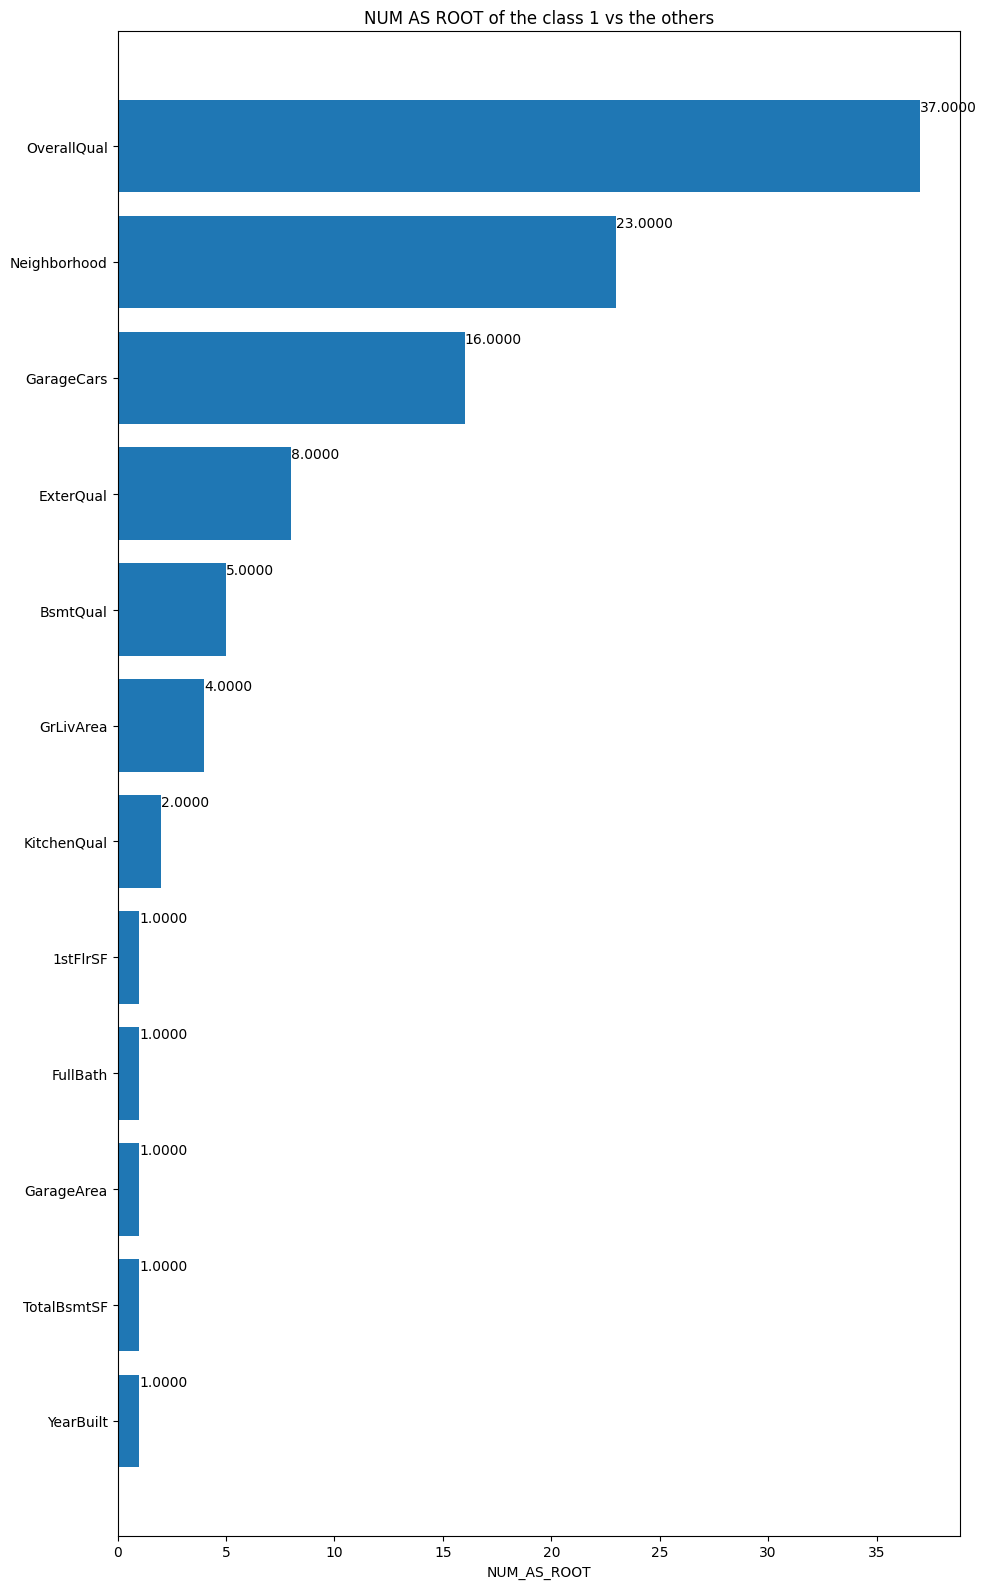

In [57]:
#plotting variable importance

plt.figure(figsize=(10, 16))

variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]


feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()



In [58]:


ids = test_data['Id']  # Use Ids from data_test for predictions
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(data_test, task=tfdf.keras.Task.REGRESSION)

# Make predictions on the test dataset
preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids, 'SalePrice': preds.squeeze()})
output.head()

2/2 [==============================] - 1s 13ms/step


,Id,SalePrice
0,1461,119518.843750
1,1462,155883.578125
2,1463,184660.484375
3,1464,183722.890625
4,1465,200975.500000


In [59]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 15ms/step


,Id,SalePrice
0,1461,119518.843750
1,1462,155883.578125
2,1463,184660.484375
3,1464,183722.890625
4,1465,200975.500000
